In [40]:
import pandas as pd
import numpy as np

data_kpis = pd.read_csv("data/kpis.csv")

In [177]:
start = 2005
end = 2019
data = data_kpis[(data_kpis["per"]>=start)&(data_kpis["per"]<=end)]

In [178]:
data = data.drop(columns="per")
data = data.replace(0, np.nan).groupby(["ent", "ind"]).mean("val").reset_index()
data.columns
data


,ent,ind,val
0,7,adv_cc_disc_doc_loans,0.352502
1,7,depcap_asset,0.642979
2,7,pers_cc_loans,0.385198
3,7,rate_dep,-0.091415
4,7,roe,0.219896
...,...,...,...
531,65203,pers_cc_loans,0.759687
532,65203,rate_dep,-0.181798
533,65203,roe,0.271833
534,65203,serv_rev_asset,2.514083


In [179]:
data_pivot = data.pivot(index="ent", columns="ind", values="val").fillna(0).reset_index()
data_pivot

ind,ent,adv_cc_disc_doc_loans,depcap_asset,pers_cc_loans,rate_dep,roe,serv_rev_asset,tit_asset
0,7,0.352502,0.642979,0.385198,-0.091415,0.219896,2.382557,0.130240
1,11,0.139910,0.768115,0.130743,-0.067667,0.211051,0.740270,0.357552
2,14,0.322641,0.794993,0.400150,-0.083461,0.248739,13.902889,0.279624
3,15,0.209914,0.671796,0.238774,-0.057503,0.233686,1.506671,0.149482
4,16,0.484375,0.618164,0.270535,-0.022974,0.363518,1.514539,0.163570
...,...,...,...,...,...,...,...,...
73,44099,0.013447,0.075169,0.000000,-0.277544,0.134017,0.477386,0.000000
74,45030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75,45056,0.036660,0.818226,0.746327,-0.159293,0.207985,1.317684,0.087357
76,45072,0.677445,0.629487,0.109647,-0.090370,-0.180922,1.193929,0.094995


In [180]:
# importing minmax scaler 
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# mm_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
data_scaled = data_pivot
data_scaled[data_scaled.columns[1:]] = robust_scaler.fit_transform(data_scaled[data_scaled.columns[1:]])
data_scaled

ind,ent,adv_cc_disc_doc_loans,depcap_asset,pers_cc_loans,rate_dep,roe,serv_rev_asset,tit_asset
0,7,0.270276,0.037079,0.171622,-0.071070,0.080136,0.660649,-0.165455
1,11,-0.270895,0.264659,-0.302031,0.256899,0.011837,-0.146048,1.242288
2,14,0.194262,0.313542,0.199454,0.038774,0.302859,6.319479,0.759679
3,15,-0.092695,0.089487,-0.100938,0.397274,0.186623,0.230411,-0.046289
4,16,0.605972,-0.008052,-0.041816,0.874136,1.189149,0.234276,0.040954
...,...,...,...,...,...,...,...,...
73,44099,-0.592818,-0.995578,-0.545403,-2.641610,-0.582993,-0.275178,-0.972030
74,45030,-0.627049,-1.132286,-0.545403,1.191415,-1.617838,-0.509672,-0.972030
75,45056,-0.533726,0.355795,0.843845,-1.008497,-0.011837,0.137580,-0.431032
76,45072,1.097448,0.012541,-0.341300,-0.056636,-3.014868,0.076791,-0.383726


c:\Users\MEC\AppData\Local\pypoetry\Cache\virtualenvs\cbbm-RQGQLPr7-py3.10\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MEC\AppData\Local\pypoetry\Cache\virtualenvs\cbbm-RQGQLPr7-py3.10\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\MEC\AppData\Local\pypoetry\Cache\virtualenvs\cbbm-RQGQLPr7-py3.10\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

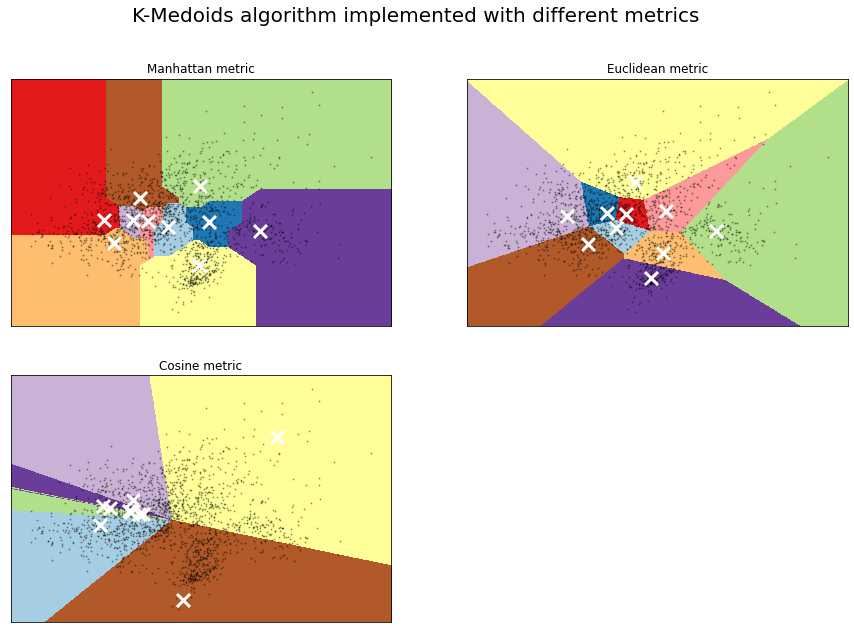

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
#Import the digits’ dataset available in sklearn.datasets package
from sklearn.datasets import load_digits
'''“””
Instead of using all 64 attributes of the dataset, we use Principal Component Analysis (PCA)  to reduce the dimensions of features set such that most of the useful information is covered.
“””'''
from sklearn.decomposition import PCA
''' “””
Import module for standardizing the dataset i.e. rescaling the data such that its has mean of 0 and standard deviation of 1
“””'''
from sklearn.preprocessing import scale 
#Load the digits dataset 
dataset = load_digits()
#Standardize the data
digit_data = scale(dataset.data)
'''“””
Compute number of output classes i.e. number of digits for which we have the data (here 10 (0-9))
“””'''
num_digits = len(np.unique(dataset.target)) 
red_data = PCA(n_components=2).fit_transform(digit_data)
'''“””
PCA constructs new components by linear combinations of original features. ‘n_components’ parameter denotes the number of newly formed components to be considered. fit_transform() method fits the PCA models and performs dimensionality reduction on digit_data.
“””'''
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = red_data[:, 0].min() - 1, red_data[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = red_data[:, 1].min() - 1, red_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
]
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2
#Clear the current figure first (if any)
plt.clf()
#Initialize dimensions of the plot
plt.figure(figsize=(15,10))
'''“””
The ‘models’ array defined in step (6) contains three tuples, each having a model variant’s parameters and its descriptive text. We iterate through each of the tuples, fit the data to the model and plot the results.
“””'''
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(red_data)
#Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
#Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
#Display the subplot
    plt.imshow(
        Z,    #data to be plotted
        interpolation="nearest",
#bounding box coordinates (left,right,bottom,top)
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,  #colormap
        aspect="auto", #aspect ratio of the axes
        origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
        red_data[:, 0], red_data[:, 1], "k.", markersize=2, alpha=0.3
    )
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,  #marker’s size (points^2)
        linewidths=3, #width of boundary lines
        color="w",  #white color for centroids markings
        zorder=10,  #drawing order of axes
    )
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
#Upper title of the whole plot
plt.suptitle(
#Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [181]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
data_arr = data_scaled[data_scaled.columns[1:]].to_numpy()

<Figure size 432x288 with 0 Axes>

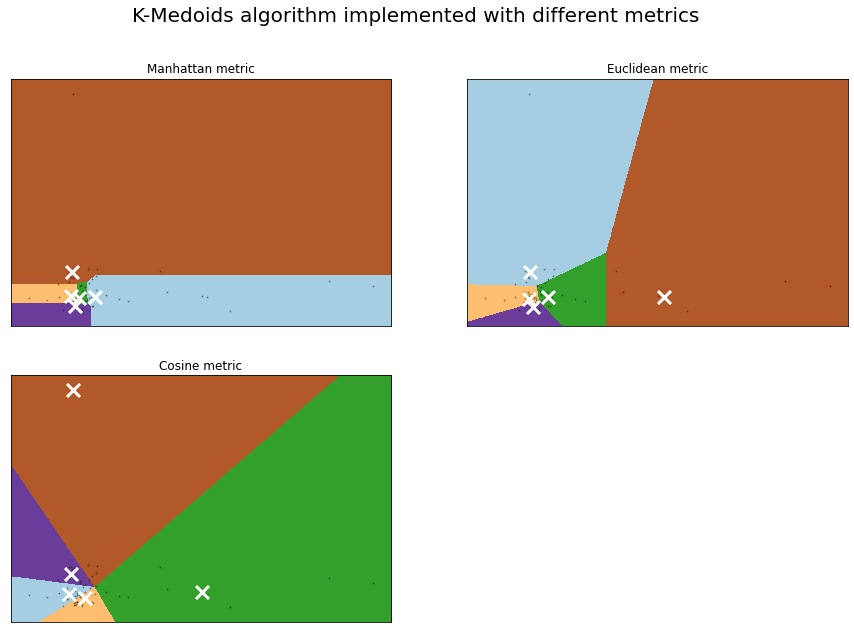

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
# Import the digits’ dataset available in sklearn.datasets package
# from sklearn.datasets import load_digits
'''“””
Instead of using all 64 attributes of the dataset, we use Principal Component Analysis (PCA) 
to reduce the dimensions of features set such that most of the useful information is covered.
“””'''
from sklearn.decomposition import PCA
''' “””
Import module for standardizing the dataset i.e. rescaling the data such that its has mean of 0 and standard deviation of 1
“””'''
from sklearn.preprocessing import RobustScaler
#Scale the data
#data_scaled = data_arr
#robust_scaler = RobustScaler().fit(data_arr)
#robust_scaler.transform(data_scaled)
'''“””
Compute number of output classes i.e. number of digits for which we have the data (here 10 (0-9))
“””'''
num_digits = 5 # len(np.unique(dataset.target)) 
data_pca = PCA(n_components=2).fit_transform(data_arr)
'''“””
PCA constructs new components by linear combinations of original features. 
‘n_components’ parameter denotes the number of newly formed components to be considered. 
fit_transform() method fits the PCA models and performs dimensionality reduction on digit_data.
“””'''
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = data_pca[:, 0].min() - 1, data_pca[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = data_pca[:, 1].min() - 1, data_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=1000),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=1000),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=1000), "Cosine metric", ),
]
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2
#Clear the current figure first (if any)
plt.clf()
#Initialize dimensions of the plot
plt.figure(figsize=(15,10))
'''“””
The ‘models’ array defined in step (6) contains three tuples, each having a model variant’s parameters and its descriptive text. 
We iterate through each of the tuples, fit the data to the model and plot the results.
“””'''
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(data_pca)
#Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
#Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
#Display the subplot
    plt.imshow(
        Z,    #data to be plotted
        interpolation="nearest",
#bounding box coordinates (left,right,bottom,top)
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,  #colormap
        aspect="auto", #aspect ratio of the axes
        origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
        data_pca[:, 0], data_pca[:, 1], "k.", markersize=2, alpha=0.3
    )
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,  #marker’s size (points^2)
        linewidths=3, #width of boundary lines
        color="w",  #white color for centroids markings
        zorder=10,  #drawing order of axes
    )
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
#Upper title of the whole plot
plt.suptitle(
#Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [171]:
# print(data_arr.shape, pca_arr.shape, xmin, xmax, ymin, ymax)

In [182]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

data_pca = PCA(n_components=2).fit_transform(data_arr)

k_med = KMedoids(metric="manhattan", n_clusters=5, 
         init="heuristic", max_iter=1000).fit(data_pca)

k_means = KMeans(n_clusters=5, max_iter=1000).fit(data_pca)

y_k_med = k_med.fit_predict(data_pca)

y_k_means = k_means.fit_predict(data_pca)

kmed_labels = k_med.labels_
labels = set(kmed_labels)

kmeans_labels = k_means.labels_

In [183]:
k_med_clust = k_med.cluster_centers_ # PCA(n_components=2).fit_transform(robust_scaler.fit_transform(k_med.cluster_centers_))
k_means_clust = k_means.cluster_centers_ # PCA(n_components=2).fit_transform(robust_scaler.fit_transform(k_means.cluster_centers_))

In [184]:
df_clust = pd.DataFrame(data_pca, columns=["pca1", "pca2"])
df_clust["ent"] = data_scaled["ent"]
df_clust["kmed"] = y_k_med
df_clust["kmeans"] = y_k_means
df_clust["kmed_cc1"] = [k_med_clust[c, 0] for c in df_clust["kmed"]]
df_clust["kmed_cc2"] = [k_med_clust[c, 1] for c in df_clust["kmed"]]
df_clust["kmeans_cc1"] = [k_means_clust[c, 0] for c in df_clust["kmeans"]]
df_clust["kmeans_cc2"] = [k_means_clust[c, 1] for c in df_clust["kmeans"]]
df_clust

,pca1,pca2,ent,kmed,kmeans,kmed_cc1,kmed_cc2,kmeans_cc1,kmeans_cc2
0,-0.291088,-0.425995,7,0,0,-0.908801,-0.867601,-0.731102,-0.729171
1,-1.127601,-0.526904,11,0,0,-0.908801,-0.867601,-0.731102,-0.729171
2,5.360476,-0.724386,14,1,1,5.046945,-0.051171,5.278196,-0.062323
3,-0.742815,-0.772766,15,0,0,-0.908801,-0.867601,-0.731102,-0.729171
4,-0.742204,-1.866719,16,0,0,-0.908801,-0.867601,-0.731102,-0.729171
...,...,...,...,...,...,...,...,...,...
73,-1.210078,1.719826,44099,4,4,-1.074919,1.932340,-1.375175,1.152895
74,-1.539665,0.354131,45030,2,4,-1.256722,-0.038410,-1.375175,1.152895
75,-0.769400,0.189793,45056,2,0,-1.256722,-0.038410,-0.731102,-0.729171
76,-0.893792,2.025277,45072,4,4,-1.074919,1.932340,-1.375175,1.152895


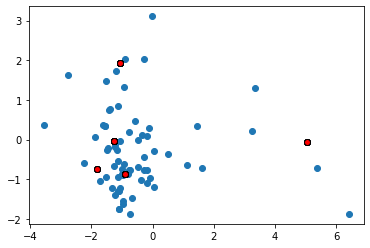

In [186]:
plt.scatter(df_clust["pca1"].loc[(df_clust["pca1"]<=7)&(df_clust["pca2"]<=6)], df_clust["pca2"].loc[(df_clust["pca1"]<=7)&(df_clust["pca2"]<=6)])
plt.scatter(df_clust["kmed_cc1"].loc[(df_clust["pca1"]<=7)&(df_clust["pca2"]<=6)], df_clust["kmed_cc2"].loc[(df_clust["pca1"]<=7)&(df_clust["pca2"]<=6)], edgecolors="black", color="red")
# plt.scatter(df_clust["kmeans_cc1"].loc[df_clust["pca2"]<=6], df_clust["kmeans_cc2"].loc[df_clust["pca2"]<=6], edgecolors="black", color="green")

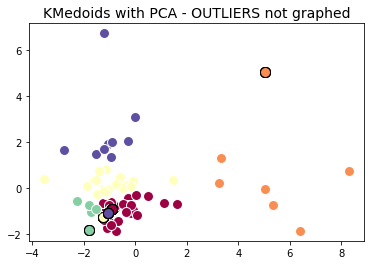

In [188]:
# — — — — — — -Setting Up Color Codes — — — — — — — — — — — -
colors_plot = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(labels))]

for k, col in zip(labels, colors_plot):
    class_member_mask = df_clust["kmed"] == k
 
    # — — — — — — -Setting datapoint Feature X and Feature Y — — — — — — — — — — — -
    pca1 = df_clust["pca1"][class_member_mask].loc[(df_clust["pca1"]<=10)&(df_clust["pca2"]<=10)]
    pca2 = df_clust["pca2"][class_member_mask].loc[(df_clust["pca1"]<=10)&(df_clust["pca2"]<=10)]

    kmed_cc1 = df_clust["kmed_cc1"][class_member_mask].loc[(df_clust["pca1"]<=10)&(df_clust["pca2"]<=10)]
    kmed_cc2 = df_clust["kmed_cc1"][class_member_mask].loc[(df_clust["pca1"]<=10)&(df_clust["pca2"]<=10)]

    color = tuple(col)
 
    # — — — — — — -Plotting Feature X and Feature Y for each cluster labels — — — — — — — — — — — -
    plt.plot(
                pca1,
                pca2,
                "o",
                markerfacecolor=color,
                markeredgecolor="white",
                markersize=10,
            )

    # — — — — — — -Annotate Centroids — — — — — — — — — — — -
    plt.plot(
                kmed_cc1,
                kmed_cc2,
                "o",
                markerfacecolor=color,
                markeredgecolor="k",
                markersize=10,
            )
# — — — — — — -Add title to the plot — — — — — — — — — — — -
plt.title("KMedoids with PCA - OUTLIERS not graphed", fontsize=14)
plt.show()

In [89]:
y_k_med

array([0, 3, 0, 1, 3, 1, 0, 0, 3, 1, 4, 2, 0, 1, 3, 3, 1, 0, 0, 4, 0, 0,
       0, 3, 1, 2, 0, 2, 3, 2, 0, 2, 2, 1, 4, 0, 2, 3, 2, 1, 0, 3, 2, 3,
       2, 3, 4, 4, 2, 0, 2, 1, 1, 3, 1, 0, 4, 3, 4, 4, 1, 4, 4, 2, 4, 3,
       3, 0, 4, 0, 1, 0], dtype=int64)

In [90]:
k_med.inertia_

108.67158560085858

In [106]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data_arr, y_k_med)
print(silhouette_avg)

-0.09462267174887626


In [107]:
sample_silhouette_values = silhouette_samples(data_pca, y_k_med)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_k_med == i]
    print(np.mean(ith_cluster_silhouette_values))

-0.3978011416154818
0.2898566254957405
0.005084038819418689
